In [154]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
import seaborn as sns
sns.set(style="whitegrid")
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [89]:
#display setting
pd.set_option('display.max_columns',None)

## 1. Data

In [93]:
#loading datasets
item = pd.read_excel("~/desktop/TidyquantAssignment/ITEM_MERCH_MASTERFILE_TestData.xlsx")
sales = pd.read_excel('~/desktop/TidyquantAssignment/Sales_Sample_Data.xlsx')

In [411]:
#few rows
item.sample(10)

,SKU,CATEGORY,COLLECTION,LINE_UP,ENTRY_DATE,CATEGORY.1,GENDER,CASE MATERIAL,CASE COLOR,CASE SHAPE,CASE SIZE,DIAL TYPE,DIAL COLOR,SKU TYPE,STRAP TYPE,STRAP COLOR,ORIGINAL PRICE,PRICE RANGE,ITEM DISC,TECHNOLOGY,BRAND
112,AH1299-0102,GENTS DRESS,FW2017,CARRYOVER,- -,REGULAR,MALE,SS,SLV,SQUARE,34MM,ANALOG,BLK,0,SS,SLV,2990,2000 - 2999,0.0,3H DATE,Brand A
163,AH2294-0103,LADIES DRESS,FW2017,CARRYOVER,- -,REGULAR,FEMALE,SS,SLV,ROUND,32MM,ANALOG,SLV,1,SS,SLV,2890,2000 - 2999,0.0,3H,Brand A
205,PPL.13600JS/04,REBEL STYLE,FW2012,PMDOWN,2012-8,ICONIC,MALE,SS,SLV,OTHERS,44MM,ANALOG,SLV,6,RUBBER,BLK,6290,3000 - 3999,0.5,3H DATE,Brand B
1068,TW5K98100,SPORTS,8LAP 2017,SPECIALS,2018-02,OPMHYB,UNISEX,RESIN,RED,ROUND,38MM,DIGITAL,NORMAL,40,RESIN,RED,4490,1000 - 1999,0.7,DIGITAL,Brand C
529,T49983,OUTDOOR,FW2014,CARRYOVER,2014-09,CEBU,MALE,RESIN,BLK,ROUND,50MM,DIGITAL,INVERTED,1,RESIN,BLK,7590,7000 - 7999,0.0,DIGITAL,Brand C
23,AE1274-0104,ENTRYPRICE,BH2015,CARRYOVER,2015-12,LOWLINE,MALE,SS,RGD,ROUND,42MM,ANALOG,BLU,1,SS,SLV,2690,2000 - 2999,0.0,3H,Brand A
557,T5K494,SPORTS,SS2011,CARRYOVER,2011-05,CEBU,MALE,RESIN,GRY,ROUND,43MM,DIGITAL,NORMAL,1,RESIN,BLK,5290,5000 - 5999,0.0,DIGITAL,Brand C
977,TW2T11400,STYLE,FW2018,CARRYOVER,2018-09,CEBU,UNISEX,BRASS,SLV,ROUND,41MM,ANALOG,BLK,3,SS,SLV,8190,8000 - 8999,0.0,CHRONO,Brand C
591,TLF591,STYLE,FW2010,PMDOWN,2010-12,CEBU,UNISEX,RESIN,GRN,ROUND,NaN,ANALOG,GRN,6,FABRIC,GRN,2490,0 - 999,0.7,3H,Brand C
1096,TW5M04700,SPORTS,8LAP 2017,SPECIALS,2018-02,OPMHYB,UNISEX,RESIN,GRN,ROUND,38MM,DIGITAL,NORMAL,6,RESIN,GRN,4490,0 - 999,0.7,DIGITAL,Brand C


In [412]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 21 columns):
SKU               1186 non-null object
CATEGORY          1186 non-null object
COLLECTION        1185 non-null object
LINE_UP           1186 non-null object
ENTRY_DATE        1058 non-null object
CATEGORY.1        1183 non-null object
GENDER            1186 non-null object
CASE MATERIAL     1184 non-null object
CASE COLOR        1184 non-null object
CASE SHAPE        1184 non-null object
CASE SIZE         1120 non-null object
DIAL TYPE         1186 non-null object
DIAL COLOR        1184 non-null object
SKU TYPE          1186 non-null int64
STRAP TYPE        1184 non-null object
STRAP COLOR       1184 non-null object
ORIGINAL PRICE    1186 non-null int64
PRICE RANGE       1186 non-null object
ITEM DISC         1186 non-null float64
TECHNOLOGY        1184 non-null object
BRAND             1186 non-null object
dtypes: float64(1), int64(2), object(18)
memory usage: 194.7+ KB


In [416]:
item.describe()

,SKU TYPE,ORIGINAL PRICE,ITEM DISC
count,1186.000000,1186.000000,1186.000000
mean,7.108769,4748.178752,0.243761
std,11.335355,1951.942809,0.250196
min,0.000000,1290.000000,0.000000
25%,1.000000,3490.000000,0.000000
50%,5.000000,4290.000000,0.300000
75%,6.000000,5790.000000,0.500000
max,41.000000,16990.000000,0.700000


In [413]:
#few rows
sales.sample(20)

,TRANS POSTED DATE,TRANS ACTUAL DATE,TRANS POSTED YEAR,TRANS POSTED MONTH,TRANS POSTED DAY,TRANS POSTED WK,TRANS ACTUAL YEAR,TRANS ACTUAL MONTH,TRANS ACTUAL DAY,TRANS ACTUAL WK,TRANS TYPE,TRANS DOC NUMBER,LOCATION CODE,BRAND,SKU,INVOICED UNITS,CREDIT MEMO UNITS,NET SALES UNITS,UNIT PRICE,INVOICED AMOUNT,SALES ACTIVITY CODE
10772,2018-12-07,2018-12-07,2018,12,7,49,2018,12,7,49,SI-ITEMS,NTSLS-0000168590,Loc 1,Brand C,TW0BW04E,1,0,1,3790,2653.00,REGULAR
2415,2018-06-15,2018-06-15,2018,6,15,24,2018,6,15,24,SI-ITEMS,PSINV-0381243,Loc 8,Brand C,TW2P88900,1,0,1,3000,2948.92,MYSMD
4604,2018-07-28,2018-07-28,2018,7,28,30,2018,7,28,30,SI-ITEMS,NTSLS-0000162858,Loc 2,Brand C,TW00W801E,1,0,1,1740,1740.00,MYSMD
3593,2018-07-01,2018-07-01,2018,7,1,27,2018,7,1,27,SI-ITEMS,PSINV-0385467,Loc 8,Brand C,T5K801,1,0,1,995,970.24,MYSMD
5378,2018-08-06,2018-08-06,2018,8,6,32,2018,8,6,32,SI-ITEMS,NTSLS-0000163265,Loc 2,Brand C,TW5K94600,1,0,1,995,995.00,MDAYGWP
7710,2018-09-30,2018-09-23,2018,9,30,40,2018,9,23,39,SI-ITEMS,PSINV-0403185,Loc 18,Brand C,TW00CS09E,1,0,1,1990,1492.50,MYSTMX
7493,2018-09-30,2018-09-14,2018,9,30,40,2018,9,14,37,SI-ITEMS,PSINV-0400886,Loc 19,Brand C,TW2R23700,1,0,1,4190,3107.87,REGDISC
299,2018-10-29,2018-10-16,2018,10,29,44,2018,10,16,42,SI-ITEMS,PSINV-0407051,Loc 18,Brand B,PPL.15521JSB/61,1,0,1,6890,4288.27,REGDISC
7520,2018-09-30,2018-09-15,2018,9,30,40,2018,9,15,37,SI-ITEMS,PSINV-0401628,Loc 18,Brand C,T5K427,1,0,1,990,742.50,MYSTMX
13107,2018-12-31,2018-12-19,2018,12,31,1,2018,12,19,51,SI-ITEMS,PSINV-0429799,Loc 18,Brand C,TW00R404E,1,0,1,2300,1725.00,MYSTMX


In [96]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14386 entries, 0 to 14385
Data columns (total 21 columns):
TRANS POSTED DATE      14386 non-null datetime64[ns]
TRANS ACTUAL DATE      14386 non-null datetime64[ns]
TRANS POSTED YEAR      14386 non-null int64
TRANS POSTED MONTH     14386 non-null int64
TRANS POSTED DAY       14386 non-null int64
TRANS POSTED WK        14386 non-null int64
TRANS ACTUAL YEAR      14386 non-null int64
TRANS ACTUAL MONTH     14386 non-null int64
TRANS ACTUAL DAY       14386 non-null int64
TRANS ACTUAL WK        14386 non-null int64
TRANS TYPE             14386 non-null object
TRANS DOC NUMBER       14386 non-null object
LOCATION CODE          14386 non-null object
BRAND                  14386 non-null object
SKU                    14386 non-null object
INVOICED UNITS         14386 non-null int64
CREDIT MEMO UNITS      14386 non-null int64
NET SALES UNITS        14386 non-null int64
UNIT PRICE             14386 non-null int64
INVOICED AMOUNT        14386 non

In [97]:
sales.describe()

,TRANS POSTED YEAR,TRANS POSTED MONTH,TRANS POSTED DAY,TRANS POSTED WK,TRANS ACTUAL YEAR,TRANS ACTUAL MONTH,TRANS ACTUAL DAY,TRANS ACTUAL WK,INVOICED UNITS,CREDIT MEMO UNITS,NET SALES UNITS,UNIT PRICE,INVOICED AMOUNT
count,14386.0,14386.000000,14386.000000,14386.000000,14386.0,14386.000000,14386.000000,14386.000000,14386.000000,14386.000000,14386.000000,14386.000000,14386.000000
mean,2018.0,9.583345,23.517239,31.904977,2018.0,9.582928,16.600445,38.997845,1.074656,-0.003059,1.071597,3109.094119,2582.151158
std,0.0,2.184958,8.557659,16.496804,0.0,2.184592,8.596947,11.112215,0.904006,0.056466,0.909390,1665.688765,1923.225308
min,2018.0,6.000000,1.000000,1.000000,2018.0,6.000000,1.000000,1.000000,-2.000000,-2.000000,-2.000000,590.000000,-6270.700000
25%,2018.0,8.000000,18.000000,26.000000,2018.0,8.000000,10.000000,30.000000,1.000000,0.000000,1.000000,1990.000000,1592.000000
50%,2018.0,10.000000,27.000000,35.000000,2018.0,10.000000,17.000000,41.000000,1.000000,0.000000,1.000000,2790.000000,2251.060000
75%,2018.0,12.000000,31.000000,46.000000,2018.0,12.000000,24.000000,49.000000,1.000000,0.000000,1.000000,3890.000000,3205.445000
max,2018.0,12.000000,31.000000,52.000000,2018.0,12.000000,31.000000,52.000000,71.000000,0.000000,71.000000,14990.000000,112890.000000


In [414]:
#merging both the datasets in a single table according to SKU
df = pd.merge(sales, item)

## 2. Data Overview

In [417]:
#first few rows
df.head()

,TRANS POSTED DATE,TRANS ACTUAL DATE,TRANS POSTED YEAR,TRANS POSTED MONTH,TRANS POSTED DAY,TRANS POSTED WK,TRANS ACTUAL YEAR,TRANS ACTUAL MONTH,TRANS ACTUAL DAY,TRANS ACTUAL WK,TRANS TYPE,TRANS DOC NUMBER,LOCATION CODE,BRAND,SKU,INVOICED UNITS,CREDIT MEMO UNITS,NET SALES UNITS,UNIT PRICE,INVOICED AMOUNT,SALES ACTIVITY CODE,CATEGORY,COLLECTION,LINE_UP,ENTRY_DATE,CATEGORY.1,GENDER,CASE MATERIAL,CASE COLOR,CASE SHAPE,CASE SIZE,DIAL TYPE,DIAL COLOR,SKU TYPE,STRAP TYPE,STRAP COLOR,ORIGINAL PRICE,PRICE RANGE,ITEM DISC,TECHNOLOGY
0,2018-06-01,2018-06-01,2018,6,1,22,2018,6,1,22,SI-ITEMS,NTSLS-0000160330,Loc 2,Brand B,PPL.15302JSB/07M,1,0,1,8190,6552.00,REGULAR,URBAN STYLE,FW2017,CARRYOVER,NaN,ICONIC,MALE,SS,SLV,ROUND,45MM,ANALOG,BRW,0,SS,SLV,8190,8000 - 8999,0.0,MULTIFUNCTION
1,2018-06-29,2018-06-16,2018,6,29,26,2018,6,16,24,SI-ITEMS,PSINV-0381648,Loc 19,Brand B,PPL.15302JSB/07M,1,0,1,8190,5220.91,REGDISC,URBAN STYLE,FW2017,CARRYOVER,NaN,ICONIC,MALE,SS,SLV,ROUND,45MM,ANALOG,BRW,0,SS,SLV,8190,8000 - 8999,0.0,MULTIFUNCTION
2,2018-07-31,2018-07-24,2018,7,31,31,2018,7,24,30,SI-ITEMS,PSINV-0390187,Loc 18,Brand B,PPL.15302JSB/07M,1,0,1,8190,4782.96,MYSREG,URBAN STYLE,FW2017,CARRYOVER,NaN,ICONIC,MALE,SS,SLV,ROUND,45MM,ANALOG,BRW,0,SS,SLV,8190,8000 - 8999,0.0,MULTIFUNCTION
3,2018-10-31,2018-10-23,2018,10,31,44,2018,10,23,43,SI-ITEMS,PSINV-0408275,Loc 18,Brand B,PPL.15302JSB/07M,1,0,1,8190,4782.96,REGDISC,URBAN STYLE,FW2017,CARRYOVER,NaN,ICONIC,MALE,SS,SLV,ROUND,45MM,ANALOG,BRW,0,SS,SLV,8190,8000 - 8999,0.0,MULTIFUNCTION
4,2018-06-01,2018-06-01,2018,6,1,22,2018,6,1,22,SI-ITEMS,NTSLS-0000160340,Loc 9,Brand B,PPL.14378JSR/12P,1,0,1,7490,5243.00,REGDISC,URBAN STYLE,SS2015,CARRYOVER,2015-3,ICONIC,MALE,SS,RGD,ROUND,50MM,ANALOG,BRW,2,RUBBER,BRW,7890,7000 - 7999,0.0,MULTIFUNCTION


In [418]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  14386
Columns  :  40

Features : 
 ['TRANS POSTED DATE', 'TRANS ACTUAL DATE', 'TRANS POSTED YEAR', 'TRANS POSTED MONTH', 'TRANS POSTED DAY', 'TRANS POSTED WK', 'TRANS ACTUAL YEAR', 'TRANS ACTUAL MONTH', 'TRANS ACTUAL DAY', 'TRANS ACTUAL WK', 'TRANS TYPE', 'TRANS DOC NUMBER', 'LOCATION CODE', 'BRAND', 'SKU', 'INVOICED UNITS', 'CREDIT MEMO UNITS', 'NET SALES UNITS', 'UNIT PRICE', 'INVOICED AMOUNT ', 'SALES ACTIVITY CODE', 'CATEGORY', 'COLLECTION', 'LINE_UP', 'ENTRY_DATE', 'CATEGORY.1', 'GENDER', 'CASE MATERIAL', 'CASE COLOR', 'CASE SHAPE', 'CASE SIZE', 'DIAL TYPE', 'DIAL COLOR', 'SKU TYPE', 'STRAP TYPE', 'STRAP COLOR', 'ORIGINAL PRICE', 'PRICE RANGE', 'ITEM DISC', 'TECHNOLOGY']

Missing values :   1531

Unique values :  
 TRANS POSTED DATE       214
TRANS ACTUAL DATE       215
TRANS POSTED YEAR         1
TRANS POSTED MONTH        7
TRANS POSTED DAY         31
TRANS POSTED WK          32
TRANS ACTUAL YEAR         1
TRANS ACTUAL MONTH        7
TRANS ACTUAL DAY         31
TRANS 

In [419]:
df.describe()

,TRANS POSTED YEAR,TRANS POSTED MONTH,TRANS POSTED DAY,TRANS POSTED WK,TRANS ACTUAL YEAR,TRANS ACTUAL MONTH,TRANS ACTUAL DAY,TRANS ACTUAL WK,INVOICED UNITS,CREDIT MEMO UNITS,NET SALES UNITS,UNIT PRICE,INVOICED AMOUNT,SKU TYPE,ORIGINAL PRICE,ITEM DISC
count,14386.0,14386.000000,14386.000000,14386.000000,14386.0,14386.000000,14386.000000,14386.000000,14386.000000,14386.000000,14386.000000,14386.000000,14386.000000,14386.000000,14386.000000,14386.000000
mean,2018.0,9.583345,23.517239,31.904977,2018.0,9.582928,16.600445,38.997845,1.074656,-0.003059,1.071597,3109.094119,2582.151158,9.204435,4176.083692,0.270311
std,0.0,2.184958,8.557659,16.496804,0.0,2.184592,8.596947,11.112215,0.904006,0.056466,0.909390,1665.688765,1923.225308,15.291813,1382.966389,0.242864
min,2018.0,6.000000,1.000000,1.000000,2018.0,6.000000,1.000000,1.000000,-2.000000,-2.000000,-2.000000,590.000000,-6270.700000,0.000000,1290.000000,0.000000
25%,2018.0,8.000000,18.000000,26.000000,2018.0,8.000000,10.000000,30.000000,1.000000,0.000000,1.000000,1990.000000,1592.000000,1.000000,3490.000000,0.000000
50%,2018.0,10.000000,27.000000,35.000000,2018.0,10.000000,17.000000,41.000000,1.000000,0.000000,1.000000,2790.000000,2251.060000,1.000000,4190.000000,0.300000
75%,2018.0,12.000000,31.000000,46.000000,2018.0,12.000000,24.000000,49.000000,1.000000,0.000000,1.000000,3890.000000,3205.445000,6.000000,4490.000000,0.500000
max,2018.0,12.000000,31.000000,52.000000,2018.0,12.000000,31.000000,52.000000,71.000000,0.000000,71.000000,14990.000000,112890.000000,41.000000,16990.000000,0.700000


In [420]:
#Checking missing values
df.isnull().sum().sort_values(ascending=False)

CASE SIZE              853
ENTRY_DATE             643
CATEGORY.1               6
TECHNOLOGY               4
DIAL COLOR               4
CASE COLOR               4
CASE SHAPE               4
CASE MATERIAL            4
STRAP TYPE               4
STRAP COLOR              4
COLLECTION               1
TRANS POSTED DAY         0
TRANS ACTUAL MONTH       0
LOCATION CODE            0
TRANS DOC NUMBER         0
TRANS TYPE               0
TRANS ACTUAL WK          0
TRANS ACTUAL DAY         0
TRANS ACTUAL YEAR        0
TRANS POSTED MONTH       0
TRANS ACTUAL DATE        0
TRANS POSTED YEAR        0
TRANS POSTED WK          0
SKU                      0
BRAND                    0
INVOICED AMOUNT          0
INVOICED UNITS           0
CREDIT MEMO UNITS        0
NET SALES UNITS          0
UNIT PRICE               0
ITEM DISC                0
SALES ACTIVITY CODE      0
CATEGORY                 0
LINE_UP                  0
GENDER                   0
DIAL TYPE                0
SKU TYPE                 0
O

In [427]:
#removing missing values
df = df.loc[df['CASE SIZE'].notnull()]
df = df.loc[df['ENTRY_DATE'].notnull()]
df = df.loc[df['COLLECTION'].notnull()]

In [429]:
#modified data shape
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nMissing values :  ", df.isnull().sum().values.sum())

Rows     :  12889
Columns  :  40

Missing values :   0


___

## 3. Exploratory Data Analysis  



#### 3.1 Brand

In [431]:
df.BRAND.value_counts()

Brand C    11436
Brand A     1289
Brand B      164
Name: BRAND, dtype: int64

In [432]:
lab = df.BRAND.value_counts().keys().tolist()
val = df.BRAND.value_counts().values.tolist()

trace = go.Pie(labels=lab,
                   values=val,
                  marker = dict(colors=['royalblue','lime','red'], line=dict(color='white',width=.5)),
              hole=.6,
               rotation = 90
              )
layout = go.Layout(title='Brand EFFECT on Sales')
data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

#### 3.2 TECHNOLOGY

In [151]:
df.TECHNOLOGY.value_counts()

3H               8180
DIGITAL          2601
3H DD             899
CHRONO            493
MULTIFUNCTION     216
3H DATE           212
2H                178
COMBO              32
DUAL               31
2H DATE            24
SUBSECOND          14
IQ                  9
Name: TECHNOLOGY, dtype: int64

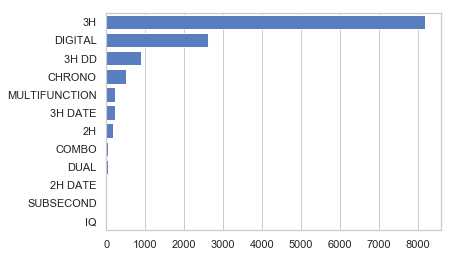

In [159]:
sns.set_color_codes("muted")
sns.barplot(x=df.TECHNOLOGY.value_counts().values.tolist(), y=df.TECHNOLOGY.value_counts().keys().tolist(),
            label="Total", color="b")

In [434]:
#function for visualization
def var_plot(colname):
    lab = df[colname].value_counts().keys().tolist()
    val = df[colname].value_counts().values.tolist()

    trace = go.Pie(labels=lab,
                   values=val,
                  marker = dict( line=dict(color='white',width=.5)),
              hole=.6,
               rotation = 90
              )
    layout = go.Layout(title=colname)
    data = [trace]
    fig = go.Figure(data=data,layout=layout)
    return py.iplot(fig)

In [435]:
var_plot('TECHNOLOGY')

#### 3.3 Gender 

In [437]:
df['GENDER'].value_counts()

MALE      6048
FEMALE    5469
UNISEX    1359
FKIDS       13
Name: GENDER, dtype: int64

In [409]:
var_plot('GENDER')

#### 3.4 ITEM DISC

In [439]:
df['ITEM DISC'].value_counts()

0.0    5140
0.5    4421
0.3    2501
0.7     827
Name: ITEM DISC, dtype: int64

In [440]:
var_plot('ITEM DISC')

#### 3.5 PRICE RANGE

In [441]:
df['PRICE RANGE'].describe()

count           12889
unique             14
top       2000 - 2999
freq             3649
Name: PRICE RANGE, dtype: object

In [453]:
def var_hist_plot(column):
    trace1 = go.Histogram(x  = sorted(df[column]),
                          histnorm= "percent",
                          name = "ITEM DISC",
                          marker = dict(line = dict(width = .2,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    data = [trace1]
    layout = go.Layout(dict(title =column + " distribution  ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=10,
                                             gridwidth=.1
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=10,
                                             ticklen=5,
                                             gridwidth=.2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    py.iplot(fig)

In [454]:
var_hist_plot('PRICE RANGE')

#### 3.6 Original Price

In [444]:
df['ORIGINAL PRICE'].describe()

count    12889.000000
mean      4177.500970
std       1328.604172
min       1290.000000
25%       3590.000000
50%       4290.000000
75%       4490.000000
max      16990.000000
Name: ORIGINAL PRICE, dtype: float64

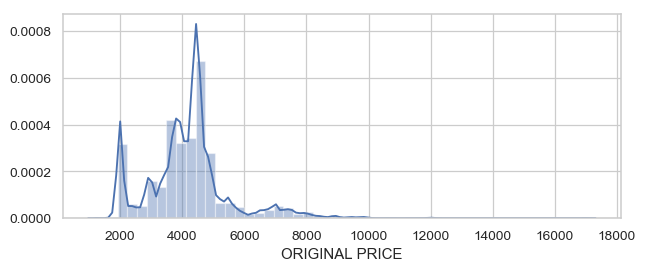

In [445]:
plt.figure(figsize=(8,3), dpi=90)
sns.distplot(df['ORIGINAL PRICE'], kde=True)
plt.show()

#### 3.7 STRAP COLOR

In [455]:
df['STRAP COLOR'].value_counts()

GLD           3066
SLV           2543
BLK           2364
BRW           1543
2T GLD SLV    1315
BLU            429
GRN            323
WHT            295
GRY            252
RGD            251
ORN            128
YLW            107
RED             98
PPL             86
PNK             74
2T RGD SLV      12
2T BLK SLV       3
Name: STRAP COLOR, dtype: int64

In [480]:
var_hist_plot('STRAP COLOR')

#### 3.8 STRAP TYPE

In [481]:
var_hist_plot('STRAP TYPE')

___

#### 3.9 SKU TYPE

In [228]:
df['SKU TYPE'].value_counts()

1     7060
6     1566
41    1532
40    1061
0      812
3      755
2       58
5       45
Name: SKU TYPE, dtype: int64

In [458]:
var_plot('SKU TYPE')

#### 3.10 Dial Color and Dial Type

In [504]:
df['DIAL COLOR'].value_counts()

WHT         3093
NORMAL      2454
SLV         2254
BLK         1344
CHMP        1167
BRW         1028
GLD          599
BLU          388
INVERTED     165
GRY          112
PNK           86
GRN           78
RGD           61
RED           40
PPL           15
GRN CAMO       5
Name: DIAL COLOR, dtype: int64

In [505]:
var_plot('DIAL COLOR')
var_plot('DIAL TYPE')

#### 3.11 Case Size, Shape, Color & Material

In [482]:
var_plot('CASE SIZE')
var_plot('CASE SHAPE')


In [483]:
var_plot('CASE COLOR')
var_plot('CASE MATERIAL')

#### 3.12 COLLECTION 

In [464]:
df['COLLECTION'].describe()

count      12889
unique        42
top       BH2015
freq        2072
Name: COLLECTION, dtype: object

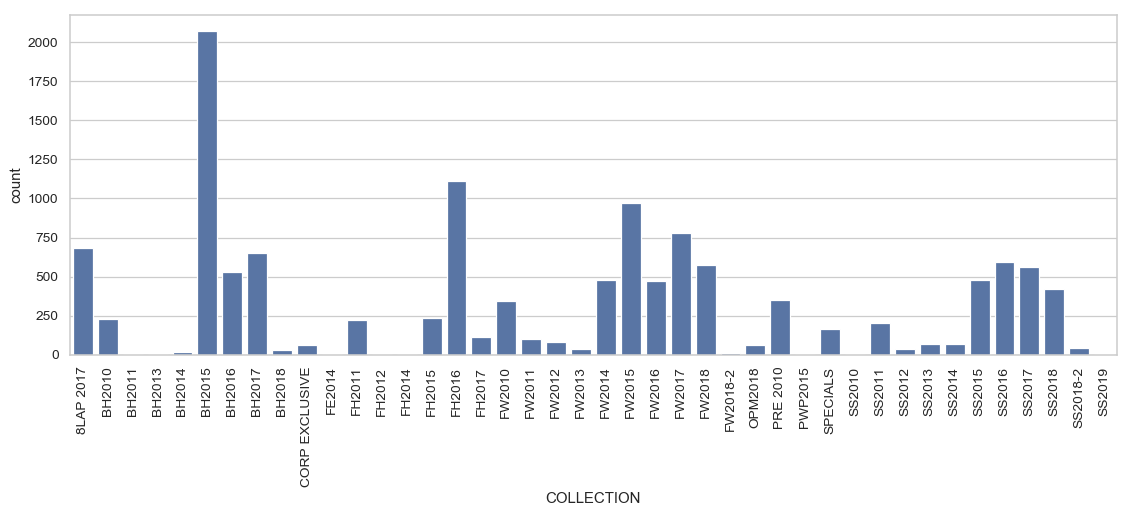

In [465]:
plt.figure(figsize=(15,5), dpi=90)
sns.countplot(df.COLLECTION, order=sorted(df.COLLECTION.unique()), color='#5975A4', saturation=100)
_, _ = plt.xticks(rotation='vertical')

In [484]:
var_hist_plot('COLLECTION')

#### 3.13 CATEGORY.1

In [468]:
df['CATEGORY.1'].value_counts()

INDIA          4985
CEBU           3297
OPMHYB         3154
REGULAR         817
LOWLINE         465
ICONIC           78
CLASSIC          54
BASELINE         21
GWP               7
URBAN STYLE       7
REBEL STYLE       4
Name: CATEGORY.1, dtype: int64

In [467]:
var_plot('CATEGORY.1')

#### 3.14 ENTRY DATE

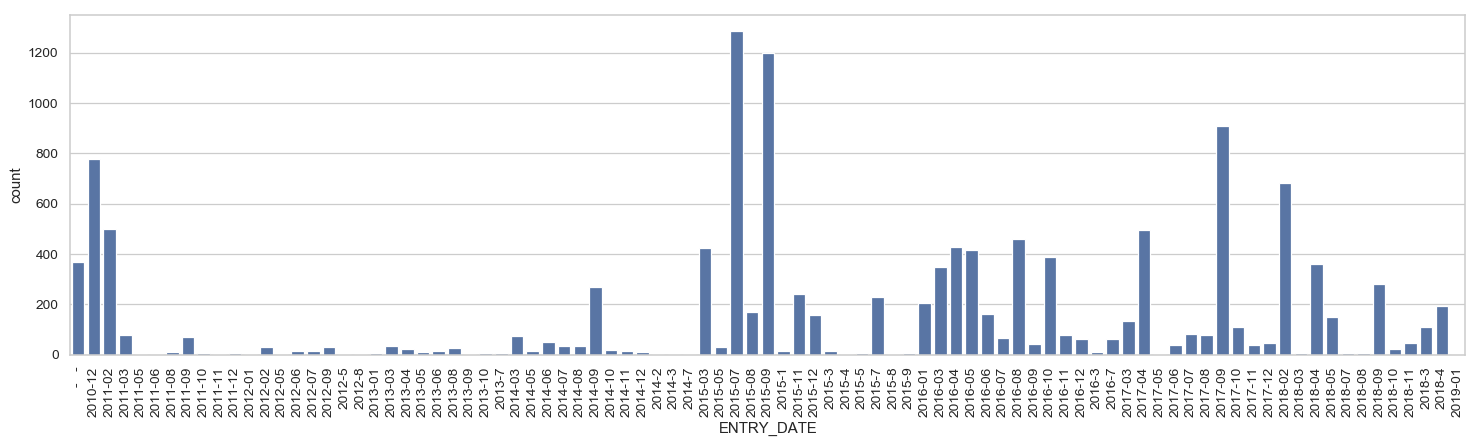

In [306]:
plt.figure(figsize=(20,5), dpi=90)
sns.countplot(x=df.ENTRY_DATE, order=sorted(df.ENTRY_DATE.unique()), color='#5975A4', saturation=100)
_, _ = plt.xticks(rotation='vertical')


In [485]:
var_hist_plot('ENTRY_DATE')

#### 3.15 LINE_UP

In [469]:
df.LINE_UP.describe()

count        12889
unique           6
top       SPECIALS
freq          6628
Name: LINE_UP, dtype: object

In [470]:
var_plot('LINE_UP')

#### 3.16 CATEGORY

In [471]:
df.CATEGORY.describe()

count      12889
unique        16
top       BASICS
freq        4985
Name: CATEGORY, dtype: object

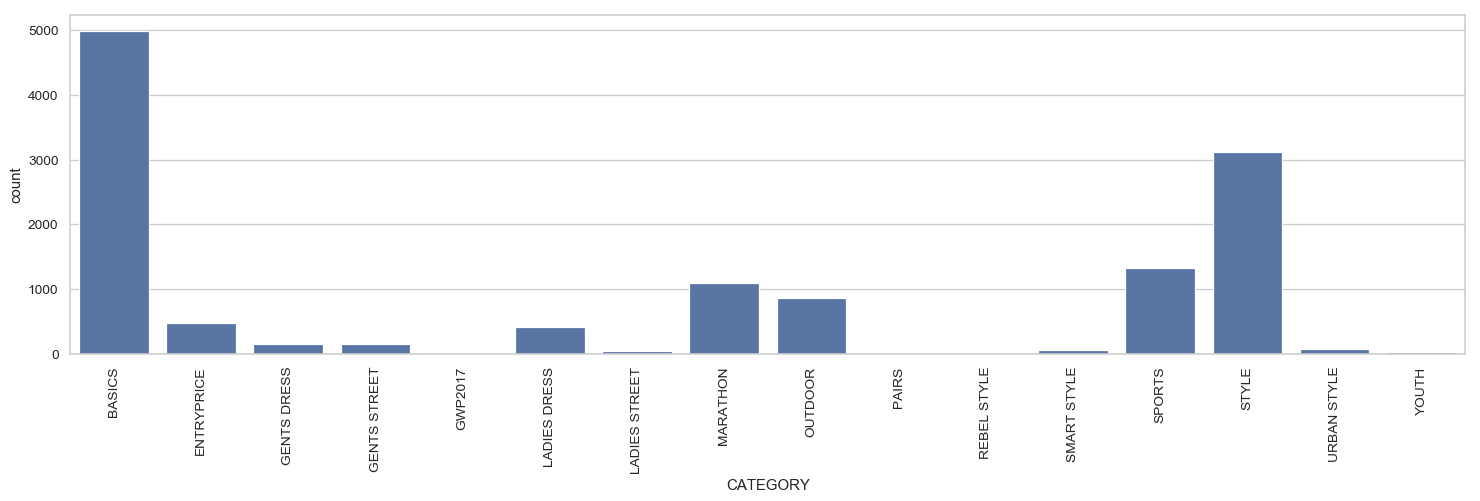

In [472]:
plt.figure(figsize=(20,5), dpi=90)
sns.countplot(x=df.CATEGORY, order=sorted(df.CATEGORY.unique()), color='#5975A4', saturation=100)
_, _ = plt.xticks(rotation='vertical')

In [486]:
var_hist_plot('CATEGORY')

#### 3.17 SALES ACTIVITY CODE

In [314]:
def var_plot_count(colname):
    plt.figure(figsize=(20,5), dpi=90)
    sns.countplot(x=df[colname], order=sorted(df[colname].unique()), color='#5975A4', saturation=100)
    _, _ = plt.xticks(rotation='vertical')

In [313]:
df['SALES ACTIVITY CODE'].describe()

count      12889
unique        40
top       MYSTMX
freq        4138
Name: SALES ACTIVITY CODE, dtype: object

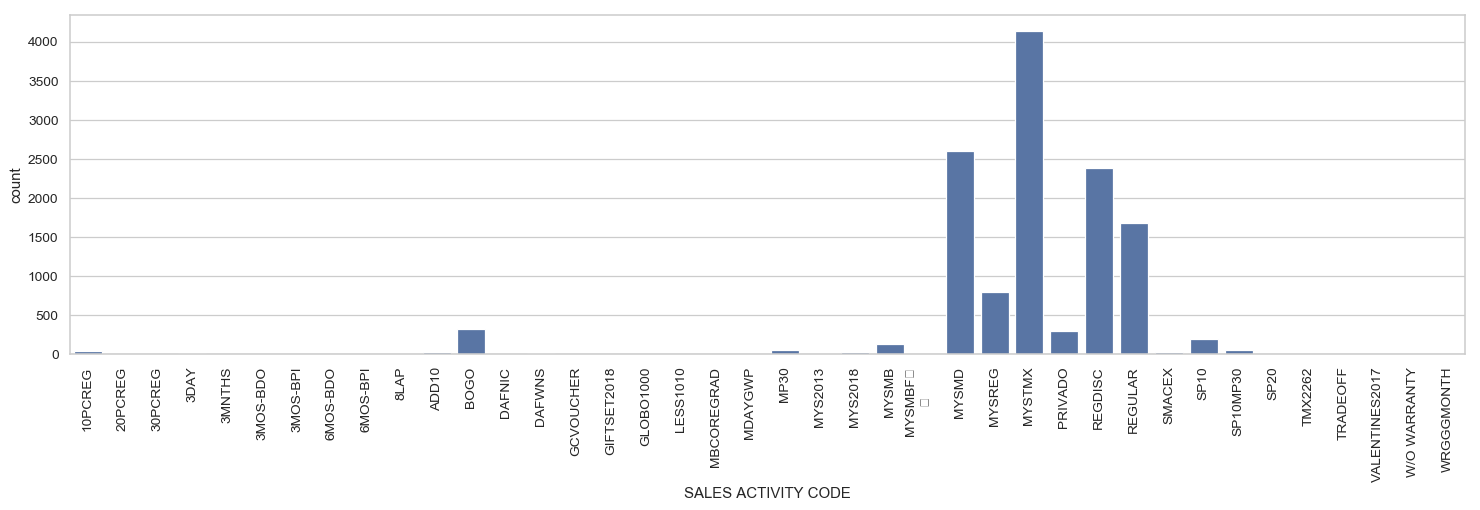

In [315]:
var_plot_count('SALES ACTIVITY CODE')

In [487]:
var_hist_plot('SALES ACTIVITY CODE')

___

#### 3.18 INVOICED AMOUNT

In [473]:
df['INVOICED AMOUNT '].describe()

count     12889.000000
mean       2593.616304
std        1958.800371
min       -5382.000000
25%        1601.170000
50%        2260.530000
75%        3217.500000
max      112890.000000
Name: INVOICED AMOUNT , dtype: float64

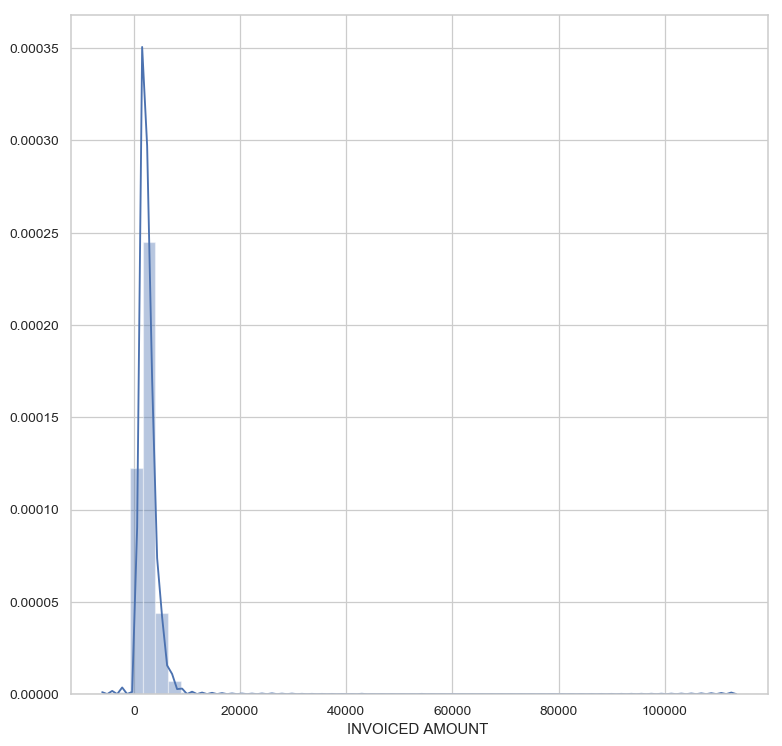

In [474]:
plt.figure(figsize=(10,10), dpi=90)
sns.distplot(df['INVOICED AMOUNT '], kde=True)
plt.show()

#### 3.19 UNIT PRICE

In [475]:
df['UNIT PRICE'].describe()

count    12889.000000
mean      3095.285592
std       1623.430982
min        590.000000
25%       1990.000000
50%       2790.000000
75%       3890.000000
max      14990.000000
Name: UNIT PRICE, dtype: float64

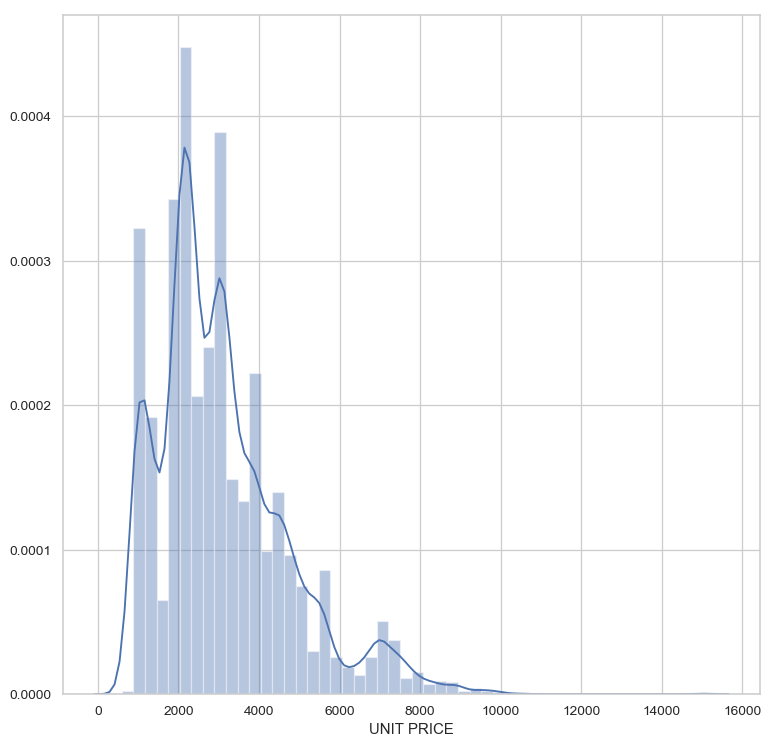

In [476]:
plt.figure(figsize=(10,10), dpi=90)
sns.distplot(df['UNIT PRICE'], kde=True)
plt.show()

#### 3.20 LOCATION CODE

In [477]:
df['LOCATION CODE'].describe()

count      12889
unique        14
top       Loc 18
freq        2076
Name: LOCATION CODE, dtype: object

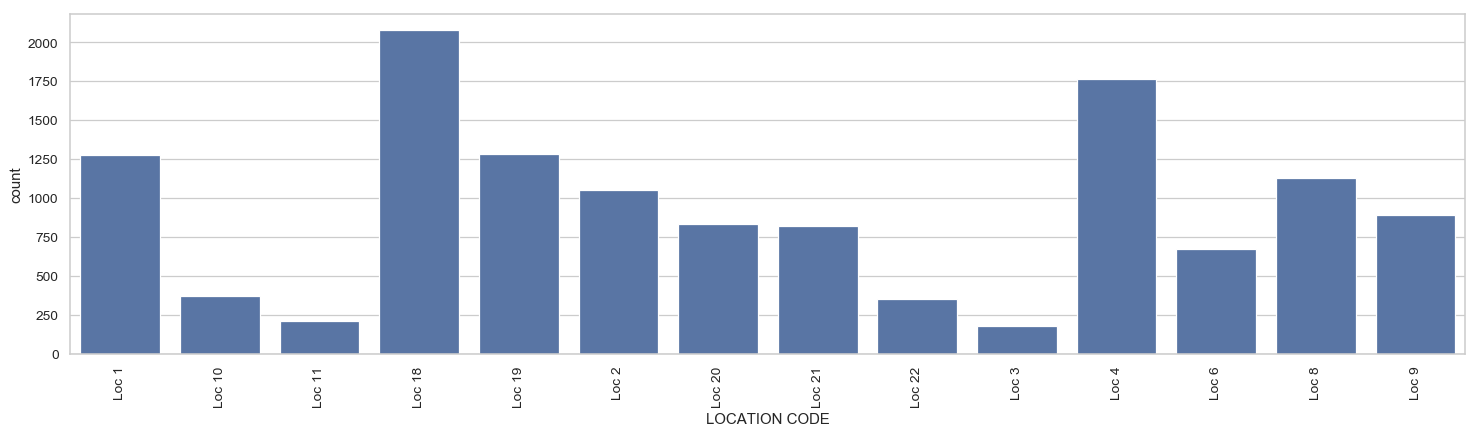

In [478]:
var_plot_count('LOCATION CODE')

___

#### 3.21 SKU

In [332]:
df.SKU.describe()

count         12889
unique          991
top       TW00B304E
freq            379
Name: SKU, dtype: object

___

#### 3.21 TRANS POSTED DATE, TRANS POSTED DAY, TRANS POSTED WK,  TRANS POSTED MONTH

In [479]:
df['TRANS POSTED DATE'].describe()

count                   12889
unique                    214
top       2018-12-31 00:00:00
freq                     2160
first     2018-06-01 00:00:00
last      2018-12-31 00:00:00
Name: TRANS POSTED DATE, dtype: object

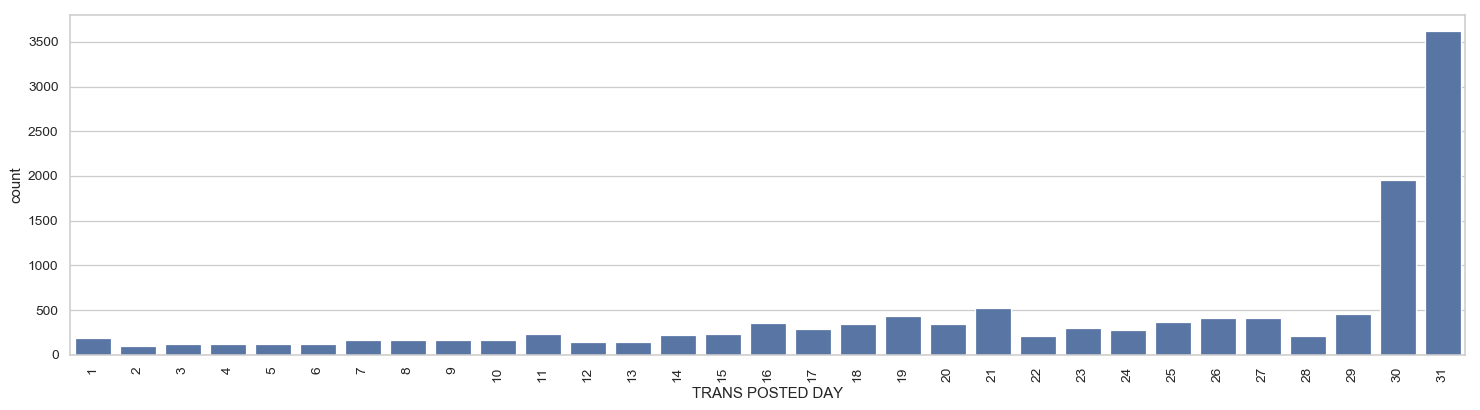

In [339]:
var_plot_count('TRANS POSTED DAY')

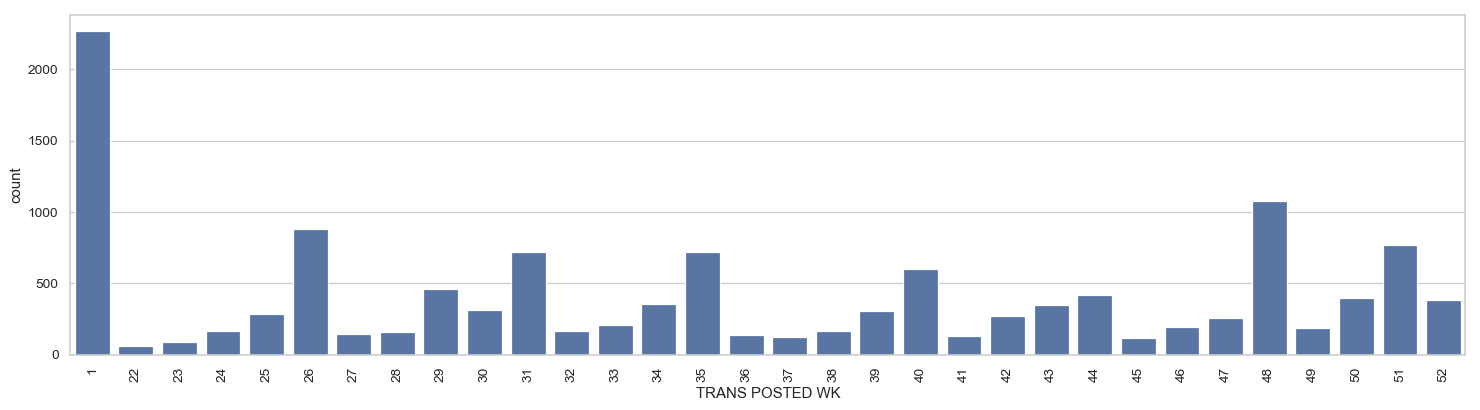

In [340]:
var_plot_count('TRANS POSTED WK')

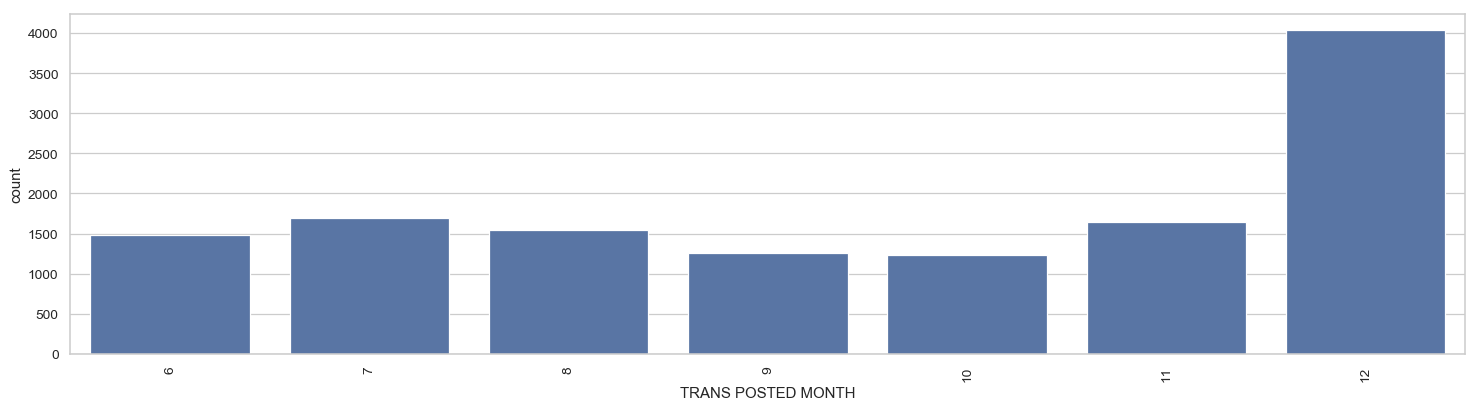

In [341]:
var_plot_count('TRANS POSTED MONTH')

___

#### 3.22 TRANS ACTUAL DATE, TRANS ACTUAL DAY, TRANS ACTUAL WK, TRANS ACTUAL MONTH, TRANS ACTUAL YEAR

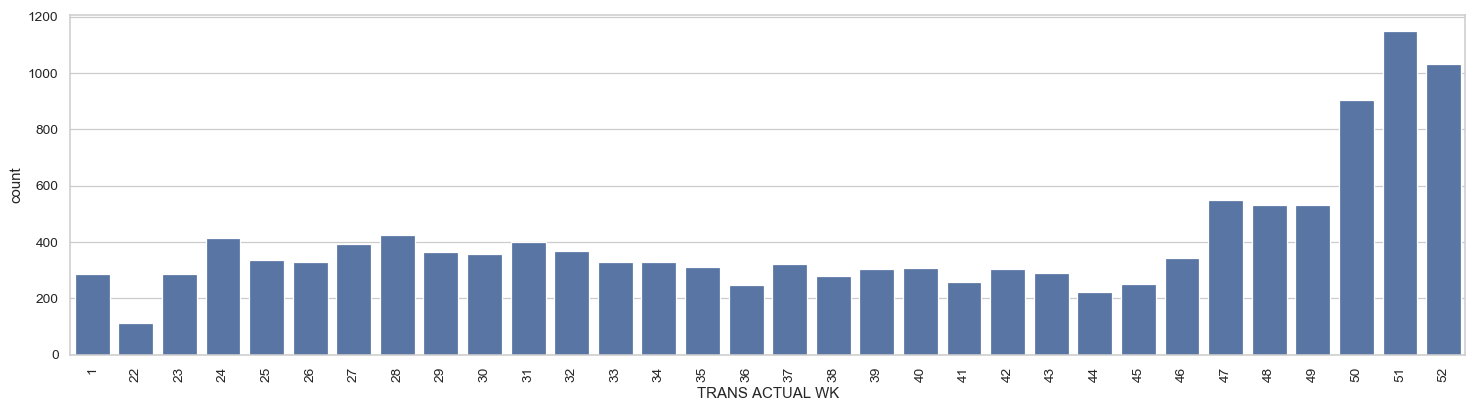

In [343]:
var_plot_count('TRANS ACTUAL WK')

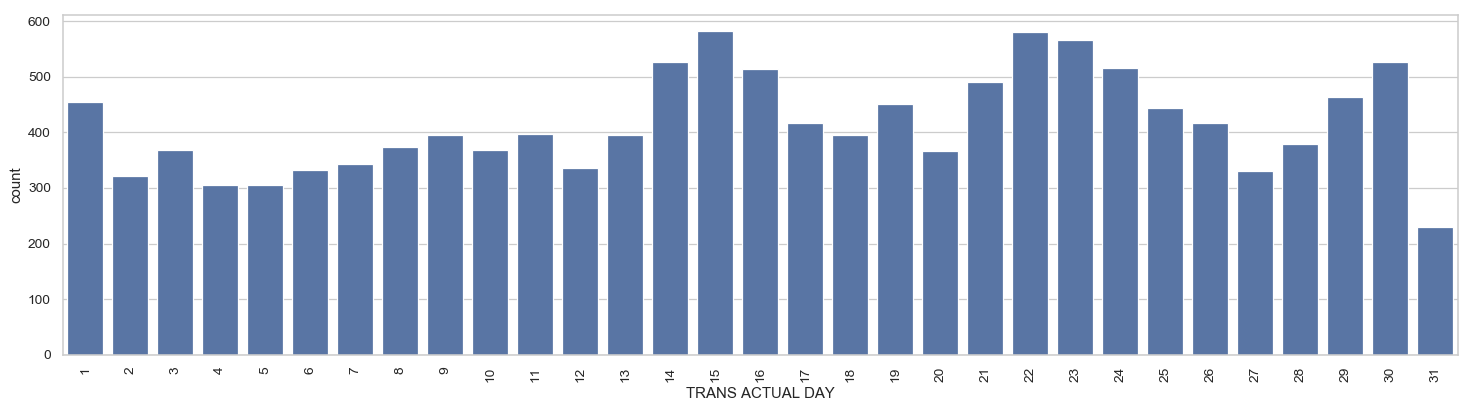

In [344]:
var_plot_count('TRANS ACTUAL DAY')

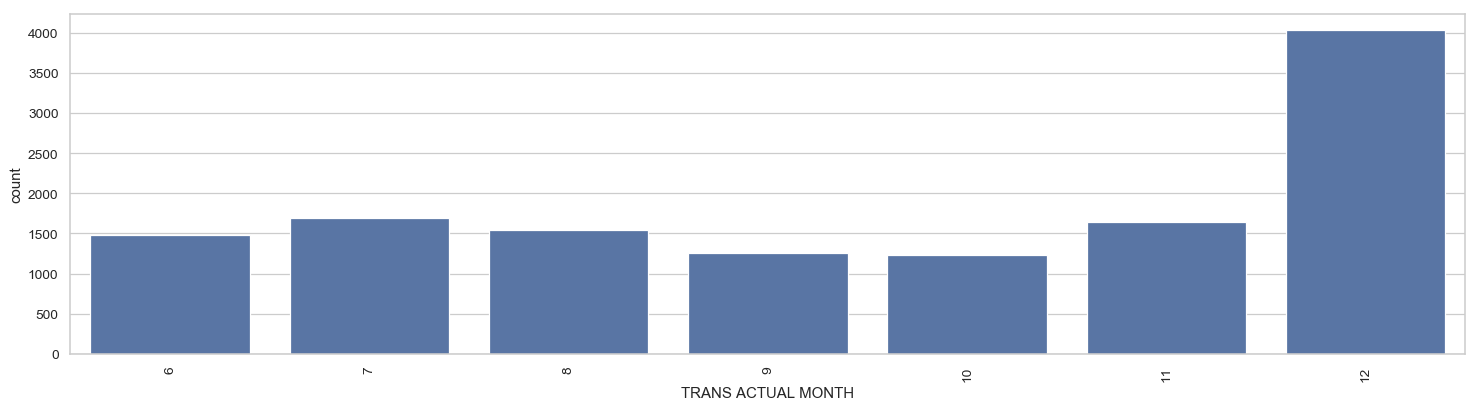

In [345]:
var_plot_count('TRANS ACTUAL MONTH')

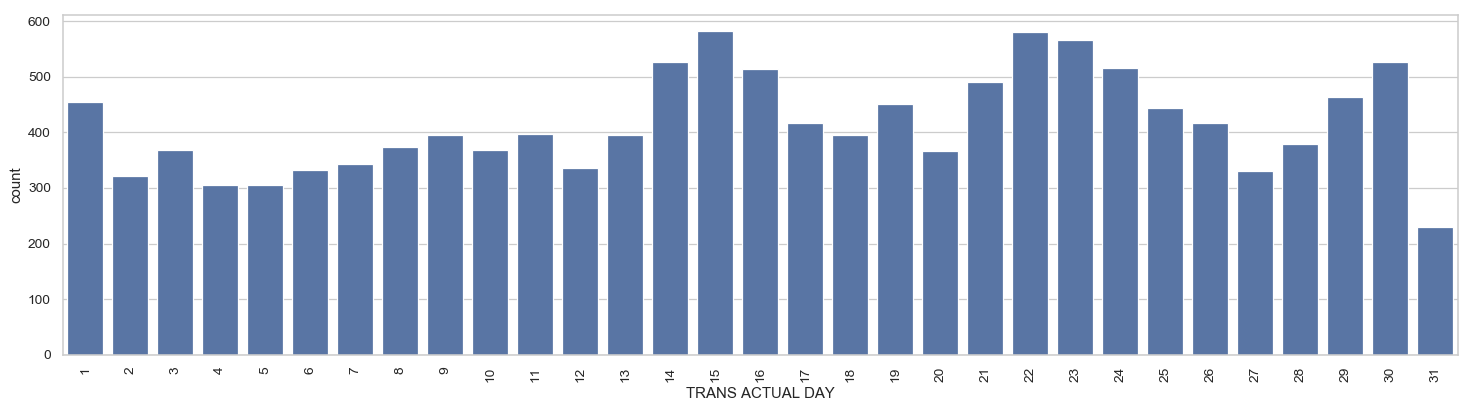

In [348]:
var_plot_count('TRANS ACTUAL DAY')

#### 3.23 TRANS TYPE

In [351]:
var_plot('TRANS TYPE')

#### 3.24 TRANS DOC NUMBER

In [352]:
df['TRANS DOC NUMBER'].describe()

count                12889
unique                2363
top       NTSLS-0000169863
freq                    73
Name: TRANS DOC NUMBER, dtype: object